In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
Train_data = pd.read_csv('SalaryData_Train(1).csv')
Test_data  = pd.read_csv('SalaryData_Test(1).csv')

In [3]:
data = pd.merge(Train_data,Test_data)

In [4]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
2,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
3,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
4,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K


In [5]:
data.shape

(5910, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 0 to 5909
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            5910 non-null   int64 
 1   workclass      5910 non-null   object
 2   education      5910 non-null   object
 3   educationno    5910 non-null   int64 
 4   maritalstatus  5910 non-null   object
 5   occupation     5910 non-null   object
 6   relationship   5910 non-null   object
 7   race           5910 non-null   object
 8   sex            5910 non-null   object
 9   capitalgain    5910 non-null   int64 
 10  capitalloss    5910 non-null   int64 
 11  hoursperweek   5910 non-null   int64 
 12  native         5910 non-null   object
 13  Salary         5910 non-null   object
dtypes: int64(5), object(9)
memory usage: 692.6+ KB


In [7]:
data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000
mean,32.815059,9.774450,49.204738,2.436548,38.545516
std,10.892922,1.675096,1433.023789,71.195428,7.456800
min,17.000000,1.000000,0.000000,0.000000,8.000000
25%,23.000000,9.000000,0.000000,0.000000,40.000000
50%,32.000000,9.000000,0.000000,0.000000,40.000000
75%,40.000000,10.000000,0.000000,0.000000,40.000000
max,67.000000,16.000000,99999.000000,2415.000000,85.000000


In [9]:
data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.068851,0.053700,0.039744,0.440546
educationno,0.068851,1.000000,0.057182,0.060620,0.268346
capitalgain,0.053700,0.057182,1.000000,-0.001175,0.024713
capitalloss,0.039744,0.060620,-0.001175,1.000000,0.037470
hoursperweek,0.440546,0.268346,0.024713,0.037470,1.000000


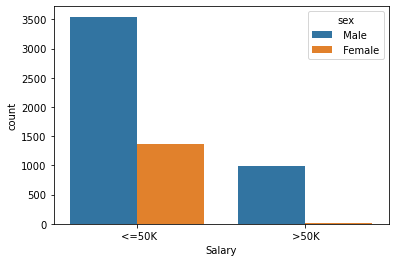

In [10]:
sns.countplot(x=data['Salary'],hue=data['sex'])
plt.show()

In [11]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [12]:
data.drop('race',axis=1,inplace=True)
data.drop('educationno',axis=1,inplace=True)
data.drop('relationship',axis=1,inplace=True)

In [13]:
le = LabelEncoder()
data['Salary'] =le.fit_transform(data['Salary'])

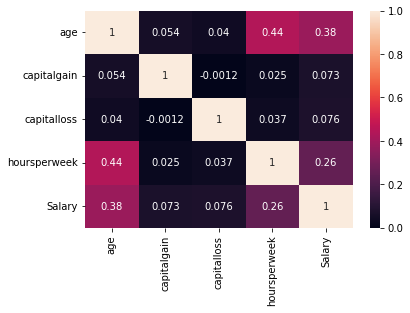

In [14]:
sns.heatmap(data.corr(),annot =True)
plt.show()

In [15]:
data.workclass.unique()

array([' Private', ' Local-gov', ' Federal-gov', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov'], dtype=object)

In [16]:
data['workclass']=le.fit_transform(data['workclass'])

In [17]:
data.education.unique()

array([' HS-grad', ' Some-college', ' Masters', ' Bachelors', ' 11th',
       ' 1st-4th', ' Assoc-acdm', ' Assoc-voc', ' 10th', ' 7th-8th',
       ' 9th', ' 12th', ' 5th-6th', ' Prof-school', ' Doctorate',
       ' Preschool'], dtype=object)

In [18]:
data['education'] = le.fit_transform(data['education'])

In [19]:
data.maritalstatus.unique()

array([' Divorced', ' Never-married', ' Married-civ-spouse', ' Separated',
       ' Widowed'], dtype=object)

In [20]:
data['maritalstatus'] = le.fit_transform(data['education'])

In [21]:
data.occupation.unique()

array([' Handlers-cleaners', ' Craft-repair', ' Machine-op-inspct',
       ' Transport-moving', ' Other-service', ' Prof-specialty',
       ' Exec-managerial', ' Sales', ' Adm-clerical', ' Tech-support',
       ' Protective-serv', ' Farming-fishing'], dtype=object)

In [22]:
data['occupation']=le.fit_transform(data['occupation'])

In [23]:
data.sex.unique()

array([' Male', ' Female'], dtype=object)

In [24]:
data['sex'] = le.fit_transform(data['sex'])

In [25]:
data.native.unique()

array([' United-States', ' Mexico', ' Philippines', ' Jamaica'],
      dtype=object)

In [26]:
data['native'] = le.fit_transform(data['native'])

In [27]:
data.head()

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,38,2,11,11,4,1,0,0,40,3,0
1,19,2,11,11,1,1,0,0,40,3,0
2,19,2,11,11,1,1,0,0,40,3,0
3,19,2,11,11,1,1,0,0,40,3,0
4,19,2,11,11,1,1,0,0,40,3,0


In [28]:
data.dtypes

age              int64
workclass        int32
education        int32
maritalstatus    int64
occupation       int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [29]:
x = data.drop('Salary',axis=1)
y = data[['Salary']]

In [30]:
std_scaler = StandardScaler()
x_scaled   = std_scaler.fit_transform(x)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.30,random_state=12)

In [32]:
x_train.shape,y_train.shape

((4137, 10), (4137, 1))

In [33]:
x_test.shape,y_test.shape

((1773, 10), (1773, 1))

In [34]:
clf =SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.01], 'kernel': ['rbf']}])

In [35]:
gsv.best_params_,gsv.best_score_

({'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8895269677509912)

In [36]:
clf = SVC(C = 10,gamma = 0.01)
clf.fit(x_train,y_train)

SVC(C=10, gamma=0.01)

In [37]:
y_pred_train = clf.predict(x_train)
acc_train = accuracy_score(y_train,y_pred_train)
print('Accuracy score:',acc_train)
confusion_matrix(y_train,y_pred_train)

Accuracy score: 0.8540004834421078


array([[3361,   53],
       [ 551,  172]], dtype=int64)

In [38]:
y_pred_test = clf.predict(x_test)
acc_test = accuracy_score(y_test,y_pred_test)
print('Accuracy score:',acc_test)
confusion_matrix(y_test,y_pred_test)

Accuracy score: 0.8640721940214326


array([[1470,   25],
       [ 216,   62]], dtype=int64)